<h1>Análise de dados - Base SRAG 2023 do Open Data SUS</h1>

<h2> Introdução </h2>
O objetivo deste projeto é analisar a base de dados de Síndrome Respiratória Grave (SRAG) de 2023, disponível no Open Data SUS, trazendo técnicas <br>
de análise de dados e ciência de dados para extrair informações importantes que podem ajudar na tomada de decisão em questões de saúde pública. 

Todos os dados apresentados podem ser acessador através do link: https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024

<h3> Tratamento de Dados: </h3>    
•	Identificar e corrigir possíveis problemas nos dados.<br>
•	Documentar todas as etapas de pré-processamento para garantir transparência. 

<h3> Análise Descritiva Inicial: </h3>
•	Explorar os principais atributos da base de dados. <br>
•	Identificar e descrever tendências temporais ao longo do ano de 2023.  <br>
•	Analisar a distribuição geográfica dos casos de SRAG.    <br>
•	Analisar a presença de fatores de risco e comorbidades nos casos de SRAG.  

<h3> Modelos de Machine Learning:  </h3>  
•	Proporcionar modelos para identificar a evolução (óbito e não óbito) dos casos de SRAG com base nas variáveis mais interessantes descobertas ao longo da análise descritiva. <br>
•	Analisar as métricas de avaliação dos modelos propostos. 

<h3> Conclusão e Recomendações: </h3>
•	Resumir os principais insights e descobertas da análise. <br>
•	Sugerir possíveis intervenções ou políticas de saúde pública com base nos resultados obtidos.    


In [ ]:
# Importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Desativa Warnings
import warnings
# warnings.filterwarnings('ignore')

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

# 1 - Leitura dos dados

In [20]:
# Lendo dados com tipo específico
df_ori = pd.read_csv(r'C:\Users\rafae\OneDrive\Área de Trabalho\Analise_SRAG_SUS\INFLUD23-04-11-2024.csv', sep=';')

C:\Users\rafae\AppData\Local\Temp\ipykernel_13084\4031494105.py:1: DtypeWarning: Columns (15,18,20,23,61,62,63,72,74,79,91,93,108,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori = pd.read_csv(r'C:\Users\rafae\OneDrive\Área de Trabalho\Analise_SRAG_SUS\INFLUD23-04-11-2024.csv', sep=';')


In [373]:
# Copia dataframe
df_raw = df_ori.copy()

In [374]:
# Definindo colunas com dados misturados
mix_columns = df_raw.columns[[15,18,20,23,61,62,63,72,74,79,91,93,108,109,130,175,178]]
mix_columns

Index(['COD_IDADE', 'CS_ESCOL_N', 'CO_PAIS', 'CO_RG_RESI', 'DT_DOSEUNI',
       'DT_1_DOSE', 'DT_2_DOSE', 'CO_RG_INTE', 'CO_MU_INTE', 'RAIOX_RES',
       'FLUASU_OUT', 'FLUBLI_OUT', 'CRITERIO', 'EVOLUCAO', 'TP_TES_AN',
       'VG_OMSOUT', 'VG_METOUT'],
      dtype='object')

In [375]:
df_raw.head(5)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_ENC,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG
0,08/02/2023,6,23/01/2023,4,RS,014 CRS,1602.0,CAMPINA DAS MISSOES,430370,POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14/02/2023,7,13/02/2023,7,SC,FLORIANOPOLIS,1476.0,FLORIANOPOLIS,420540,INSTITUTO DE ENSINO E PESQUISA DR IRINEU MAY B...,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27/02/2023,9,25/02/2023,8,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16/02/2023,7,04/02/2023,5,SP,GVE XXIV RIBEIRAO PRETO,1348.0,CAJURU,350940,CASA DE CARIDADE SAO VICENTE DE PAULO CAJURU,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/02/2023,8,24/02/2023,8,RJ,NaN,NaN,RIO DE JANEIRO,330455,SMS HOSPITAL MUNICIPAL JESUS AP 22,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
# Verificando país de residência do paciente.
print(df_raw['ID_PAIS'].value_counts()) # Verificar necessidade de exclusão de paciente com país 1
print(f'\nNúmero de valores nulos: {df_raw['ID_PAIS'].isnull().sum()}') # Não existem valores nulos

ID_PAIS
BRASIL                       279116
PARAGUAI                         31
BOLIVIA                          16
ESTADOS UNIDOS DA AMERICA         3
ARGENTINA                         3
VENEZUELA                         3
GUIANA                            2
UCRANIA                           1
GUIANA FRANCESA                   1
1                                 1
PORTUGAL                          1
AUSTRIA                           1
SUICA                             1
CUBA                              1
PERU                              1
URUGUAI                           1
ILHAS SANTA HELENA                1
Name: count, dtype: int64

Número de valores nulos: 0


# 2 - Tratamento de dados
Detectei uma grande quantidade de dados faltantes na base, farei o melhor tratamento possível, avaliando a necessidade de mante-lo dentro da análise. <br>
Realizarei a exclusão de algumas colunas que contém informações de pacientes, dados totalmente nulos, datas entre outras informações que não serão utilizadas neste processo. 

In [377]:
# Conta e trata valores nulos dos pacientes

colunas_NaN = ['CS_ZONA', 'NOSOCOMIAL', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
               'DESC_RESP', 'SATURACAO', 'DIARREIA', 'OUTRO_SIN', 'PUERPERA',
               'FATOR_RISC', 'VACINA', 'ANTIVIRAL', 'HOSPITAL', 'UTI', 
               'SUPORT_VEN', 'RAIOX_RES', 'AMOSTRA', 'TP_AMOSTRA',
               'PCR_RESUL', 'PCR_RESUL', 'DOR_ABD', 'POS_PCROUT', 'FADIGA', 
               'EVOLUCAO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA',
               'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE',
               'RENAL', 'OBESIDADE', 'AVE_SUINO', 'PERD_OLFT', 'PERD_PALA',
               'TOMO_RES', 'TRAT_COV', 'VACINA_COV']


# Exibe a contagem de valores nulos
for col in colunas_NaN:
    print(f'Existem {df_raw[col].isnull().sum()} valores nulos na coluna {col}')

for col in colunas_NaN:
    # Remove valores inválidos, converte para inteiro e padroniza como string
    df_raw[col] = pd.to_numeric(df_raw[col], errors='coerce')  # Converte para numérico
    df_raw[col] = df_raw[col].fillna(9).astype(int)  # Preenche NaN com 9 e converte para int
    df_raw[col] = df_raw[col].astype(str)  # Converte os valores para string

Existem 22317 valores nulos na coluna CS_ZONA
Existem 32789 valores nulos na coluna NOSOCOMIAL
Existem 39242 valores nulos na coluna FEBRE
Existem 25134 valores nulos na coluna TOSSE
Existem 77960 valores nulos na coluna GARGANTA
Existem 37096 valores nulos na coluna DISPNEIA
Existem 45047 valores nulos na coluna DESC_RESP
Existem 51099 valores nulos na coluna SATURACAO
Existem 79690 valores nulos na coluna DIARREIA
Existem 82400 valores nulos na coluna OUTRO_SIN
Existem 198979 valores nulos na coluna PUERPERA
Existem 1 valores nulos na coluna FATOR_RISC
Existem 127228 valores nulos na coluna VACINA
Existem 52244 valores nulos na coluna ANTIVIRAL
Existem 7531 valores nulos na coluna HOSPITAL
Existem 33212 valores nulos na coluna UTI
Existem 34878 valores nulos na coluna SUPORT_VEN
Existem 95188 valores nulos na coluna RAIOX_RES
Existem 7021 valores nulos na coluna AMOSTRA
Existem 23829 valores nulos na coluna TP_AMOSTRA
Existem 22707 valores nulos na coluna PCR_RESUL
Existem 22707 valo

In [378]:
# Limpando a base de dados de colunas desnecessárias nesta avaliação.
coluna_drop = ['ID_REGIONA', 'CO_REGIONA', 'CO_MUN_NOT', 'CO_UNI_NOT', 
               'DT_NASC', 'DT_NASC', 'COD_IDADE', 'CS_ESCOL_N', 'CO_PAIS',
               'ID_RG_RESI', 'CO_RG_RESI', 'CO_MUN_RES', 'SURTO_SG',
               'OUTRO_DES', 'OBES_IMC', 'MORB_DESC', 'OUT_MORBI', 'DT_UT_DOSE',
               'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'MAE_VAC', 'DT_DOSEUNI',
               'DT_1_DOSE', 'DT_2_DOSE', 'TP_ANTIVIR', 'DT_ANTIVIR', 'SG_UF_INTE',
               'ID_RG_INTE', 'CO_RG_INTE', 'ID_MN_INTE', 'CO_MU_INTE', 'RAIOX_OUT',
               'DT_RAIOX', 'DT_COLETA', 'OUT_AMOST', 'DT_PCR', 'TP_FLU_PCR',
               'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 
               'PCR_VSR', 'DS_PCR_OUT', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3',
               'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_BOCA',
               'PCR_RINO', 'PCR_OUTRO', 'CLASSI_OUT', 'DT_DIGITA', 
               'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM',
               'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO',
               'OUT_ANIM', 'TOMO_OUT', 'DT_TOMO', 'TP_TES_AN', 'DT_RES_AN',
               'TP_FLU_AN', 'POS_AN_FLU', 'POS_AN_OUT', 'AN_SARS2',
               'AN_VSR', 'AN_PARA1', 'AN_PARA2', 'AN_PARA3', 'AN_ADENO', 
               'AN_OUTRO', 'DS_AN_OUT', 'TP_AM_SOR', 'SOR_OUT', 'DT_CO_SOR',
               'TP_SOR', 'OUT_SOR', 'DT_RES', 'RES_IGG', 'RES_IGM', 'RES_IGA',
               'FAB_COV_1', 'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV',
               'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF', 'FNT_IN_COV',
               'FAB_COVRF2', 'LOTE_REF2', 'TIPO_TRAT', 'OUT_TRAT',
               'DT_TRT_COV', 'CO_DETEC', 'VG_OMS', 'VG_OMSOUT', 'VG_LIN',
               'VG_MET', 'VG_METOUT', 'VG_DTRES', 'VG_ENC', 'VG_REINF',
               'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI', 'DOSE_ADIC',
               'DOS_RE_BI', 'LOTE_ADIC', 'TABAG', 'ID_UNIDADE', 'CRITERIO',
               'OUT_ANTIV', 'POS_PCROUT', 'POS_PCRFLU']

df_clean = df_raw.drop(columns=coluna_drop) 

### Colunas que considerei críticas e interações necessárias

- CLASSI_FIN Dropar resultados em branco (Diagnóstico Final)             
- EVOLUCAO Dropar resultados em branco (Evolução do Caso)
- DT_ENCERRA Dropar resultados em branco (Data de Encerramento do Caso)     
- RES_AN Dropar resultados em branco (Resultado de teste Antigênico)
- VACINA_COV Dropar resultados em branco (Paciente recebeu a vacina do COVID)   
- Corrigir campo ESTRANG, se BRASIL = não.        

In [379]:
# Dropando informações de colunas importantes.
drop_info = ['CLASSI_FIN', 'EVOLUCAO', 'DT_ENCERRA',
             'RES_AN', 'VACINA_COV']

for i in drop_info:
    df_clean[i] = df_clean[i].dropna()

Tratando coluna ESTRANG

In [380]:
print(df_clean['ESTRANG'].isnull().sum(), 'Valores nulos na coluna ESTRANG')

22623 Valores nulos na coluna ESTRANG


In [381]:
# Alterando valores ESTRANG baseado na coluna ID_PAIS
df_clean.loc[df_clean['ID_PAIS'] == 'BRASIL', 'ESTRANG'] = 2
df_clean.loc[df_clean['ID_PAIS'] != 'BRASIL', 'ESTRANG'] = 1

Tratando Valores Mixados

In [382]:
# Corrigindo valores mixados
mix_columns = [i for i in mix_columns if i not in coluna_drop]
mix_columns

['RAIOX_RES', 'EVOLUCAO']

In [383]:
# Um dos valores está como texto, vamos corrigir e manter apenas um dType nesta coluna
df_clean['RAIOX_RES'].value_counts()

RAIOX_RES
9    116358
6     54692
2     44085
5     25689
1     21472
3     10850
4      6038
Name: count, dtype: int64

In [384]:
# Alterando o erro para um valor fixo 9 - Não informado.
df_clean['RAIOX_RES'] = df_clean['RAIOX_RES'].replace('HIPERINSUFLACAO PULMONAR', '9')

In [385]:
# Verificando erro da coluna Evolucao
df_clean['EVOLUCAO'].value_counts()

EVOLUCAO
1    224878
2     24880
9     21185
3      8241
Name: count, dtype: int64

In [386]:
# Alterando valores discrepantes e corrigindo mixagem de caracteres
df_clean['EVOLUCAO'] = df_clean['EVOLUCAO'].replace(['15/', '10/', '20/'], 9) # Considerar em dropar estes valores, vamos manter-los por enquanto

In [440]:
# Convertendo tipo de colunas
data_columns = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_ENTUTI',
                'DT_SAIDUTI', 'DT_EVOLUCA', 'DT_ENCERRA', 'DOSE_1_COV',
                'DOSE_2_COV', 'DOSE_REF', 'DOSE_2REF']

for col in data_columns:
    df_clean[col] = pd.to_datetime(df_clean[col], format='%d/%m/%Y', errors='coerce')

# Filtrando apenas o ano de 2023.
df_clean = df_clean[df_clean['DT_NOTIFIC'].dt.year == 2023]

In [388]:
# Verificando e excluindo valores duplicados
print(f'Existem {df_clean.duplicated().sum()} valores duplicados')

df_clean = df_clean.drop_duplicates()
print('\n Valores excluidos com sucesso.')

Existem 313 valores duplicados

 Valores excluidos com sucesso.


Tratando dados da coluna CS_CEXO

In [389]:
# Filtra apenas valores que contenham como sexo M ou F (Outros valores inseridos não condizem com a documentação, por isso foram excluídos)
df_clean = df_clean.query("CS_SEXO == 'M' or CS_SEXO == 'F' ")

# Análise exploratória
Aqui, farei a análise dos gráficos que filtramos, a medida que o projeto avança <br>
será necessário algumas transformações extras na base de dados para auxiliar no estudo do caso.

In [390]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278851 entries, 0 to 279183
Data columns (total 68 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DT_NOTIFIC  278851 non-null  datetime64[ns]
 1   SEM_NOT     278851 non-null  int64         
 2   DT_SIN_PRI  278851 non-null  datetime64[ns]
 3   SEM_PRI     278851 non-null  int64         
 4   SG_UF_NOT   278851 non-null  object        
 5   ID_MUNICIP  278851 non-null  object        
 6   CS_SEXO     278851 non-null  object        
 7   NU_IDADE_N  278851 non-null  int64         
 8   TP_IDADE    278851 non-null  int64         
 9   CS_GESTANT  278851 non-null  int64         
 10  CS_RACA     278851 non-null  float64       
 11  ID_PAIS     278851 non-null  object        
 12  SG_UF       278784 non-null  object        
 13  ID_MN_RESI  278784 non-null  object        
 14  CS_ZONA     278851 non-null  object        
 15  NOSOCOMIAL  278851 non-null  object        
 16  AVE_SUI

Como existem muitos dados rotulados como 9 - Ignorado, farei dois tipos de análise, uma com todos os valores e outros somente com dados relevantes, assim será possível ter uma visualização mais robusta do caso.

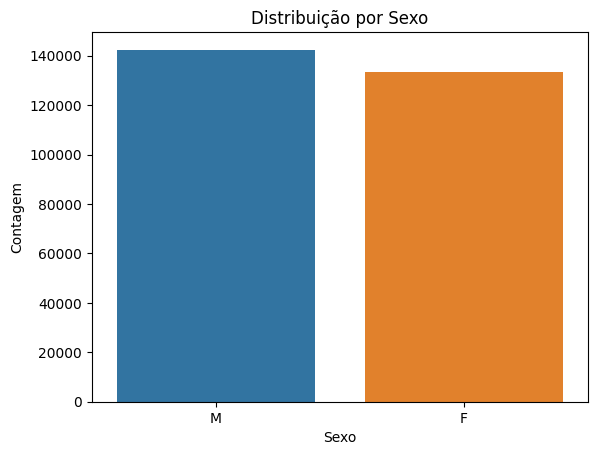

CS_SEXO
M    142438
F    133303
Name: count, dtype: int64


In [441]:
# Criando um bar plot para contagem de casos por sexo
sns.countplot(data=df_clean, x='CS_SEXO', hue='CS_SEXO')
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

print(df_clean['CS_SEXO'].value_counts())

Tivemos uma diferença de 9.135 nos casos entre homens e mulheres, umas representação de 7% entre ambos

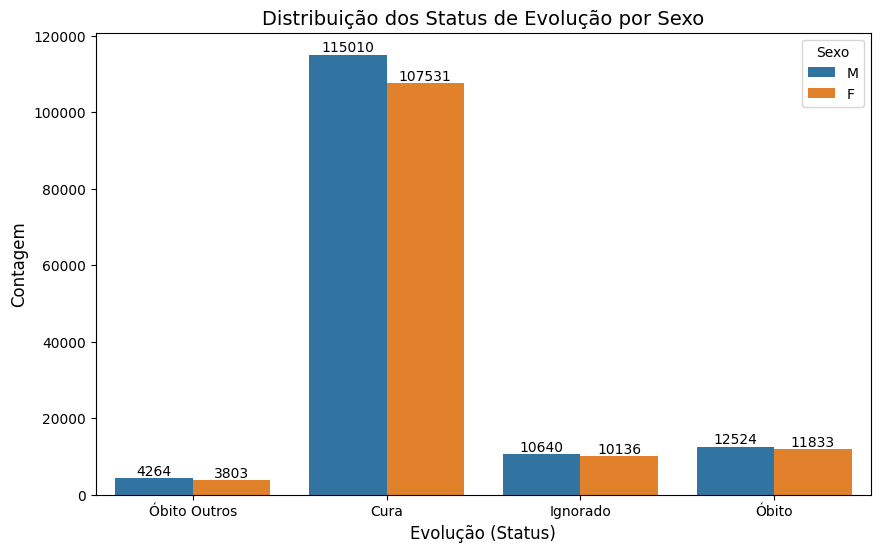

In [442]:
# Óbito por sexo

# Criando uma nova variável com nomes mais apropriados para visualização
df_visu = df_clean.copy()
df_visu['EVOLUCAO'] = df_clean['EVOLUCAO'].replace({'1': 'Cura',
                            '2': 'Óbito',
                            '3': 'Óbito Outros',
                            '9': 'Ignorado'})

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_visu, x='EVOLUCAO', hue='CS_SEXO')

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Personalizações
plt.title('Distribuição dos Status de Evolução por Sexo', fontsize=14)
plt.xlabel('Evolução (Status)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Sexo', loc='upper right')

plt.show()

<h2> Legenda de valores de Status de Evolução - </h2>
 - 1 Cura <br>
 - 2 Óbito <br>
 - 3 Óbito por outras causas <br>
 - 9 Ignorado <br>

Pessoas do sexo feminino tendem a ter um status de evolução um pouco menor do que o sexo masculino, <br> 
o que nesse caso parece ser irrelevante, pois também há uma pequena diferença entre casos registrados entre os sexos

## Verificação de fatores de risco
Levarei em consideração na maior parte do tempo a coluna FATOR_RISC, onde identifica se o paciente tem algum fator de risco ou não. 

Nessa análise, será interessante a investigação de evolução de casos de risco um pouco mais afundo, para isso utilizarei as colunas:    
- CARDIOPATI    
- HEMATOLOGI    
- SIND_DOWN     
- HEPATICA  
- ASMA  
- DIABETES  
- NEUROLOGIC    
- PNEUMOPATI    
- IMUNODEPRE
- RENAL 
- OBESIDADE

Para aumentar a robustez, talvez seja necessário a retirada dos valores 9 - Ignorado, para melhorar a qualidade dos dados,  
farei a análise ao longo do projeto, iremos utilizar também a coluna NOSOCOMIAL para identificar possíveis infecções adquiridas após a internação.

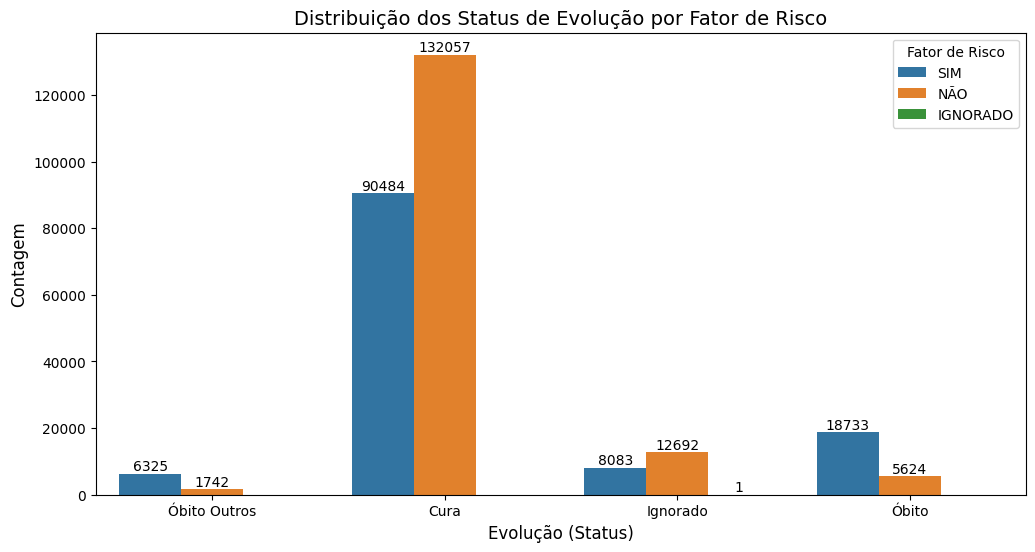

In [443]:
# Alterando dataframe de visualização para melhor entendimento
df_visu['FATOR_RISC'] = df_visu['FATOR_RISC'].replace({'1': 'SIM',
                                                       '2': 'NÃO',
                                                       '9': 'IGNORADO'})

# Relação Fator de Risco - Óbito
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_visu, x='EVOLUCAO', hue='FATOR_RISC')

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Personalizações
plt.title('Distribuição dos Status de Evolução por Fator de Risco', fontsize=14)
plt.xlabel('Evolução (Status)', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.legend(title='Fator de Risco', loc='upper right')

plt.show()

Legenda de fator se o paciente possui fator de risco.
- 1-Sim
- 2-Não
- 9-Ignorado

Aqui temos uma grande consideração de correlação entre o fator de risco e a taxa de óbito, cura e até outros óbitos.        
Dos pacientes que vieram a óbito, os com fator de risco representam 77% do total
E para os pacientes curados, apenas 41%

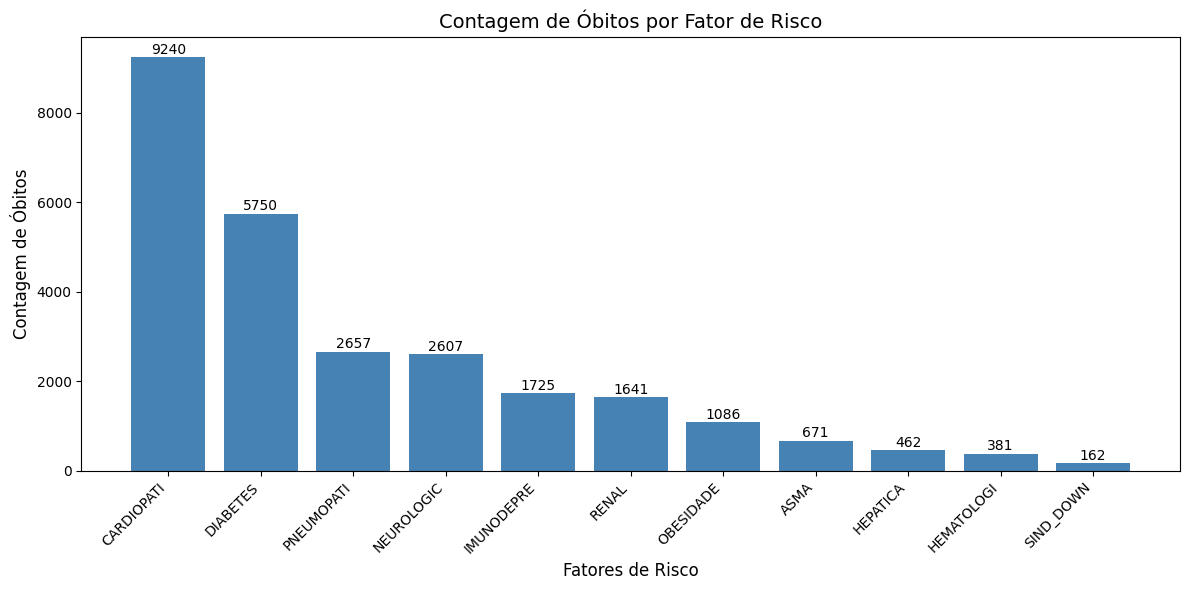

In [444]:
# Contagem de valores 1, 2 e 9 para cada fator de risco
fator_risc_col = ['CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA',
                  'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE',
                  'RENAL', 'OBESIDADE']

# Filtrando o dataframe para considerar apenas os óbitos
df_obitos = df_visu[df_visu['EVOLUCAO'] == 'Óbito']

# Contando quantos '1' existem em cada coluna de fator de risco para os óbitos
contagem_obitos = {col: (df_obitos[col] == '1').sum() for col in fator_risc_col} # Procura por string

# Convertendo o dicionário para um DataFrame para visualização
fator_risco_df = pd.DataFrame(list(contagem_obitos.items()), columns=['Fator de Risco', 'Contagem de Óbitos'])

# Ordenando os dados pela contagem de óbitos
fator_risco_df = fator_risco_df.sort_values(by='Contagem de Óbitos', ascending=False)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(fator_risco_df['Fator de Risco'], fator_risco_df['Contagem de Óbitos'], color='steelblue')

# Adicionando os valores nas barras
for i, value in enumerate(fator_risco_df['Contagem de Óbitos']):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Personalizações
plt.title('Contagem de Óbitos por Fator de Risco', fontsize=14)
plt.xlabel('Fatores de Risco', fontsize=12)
plt.ylabel('Contagem de Óbitos', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

O maior fator de risco em casos de óbito são doenças Cardiovasculares, seguidos de diabetes.

## Análise de correlação entre variáveis específicas

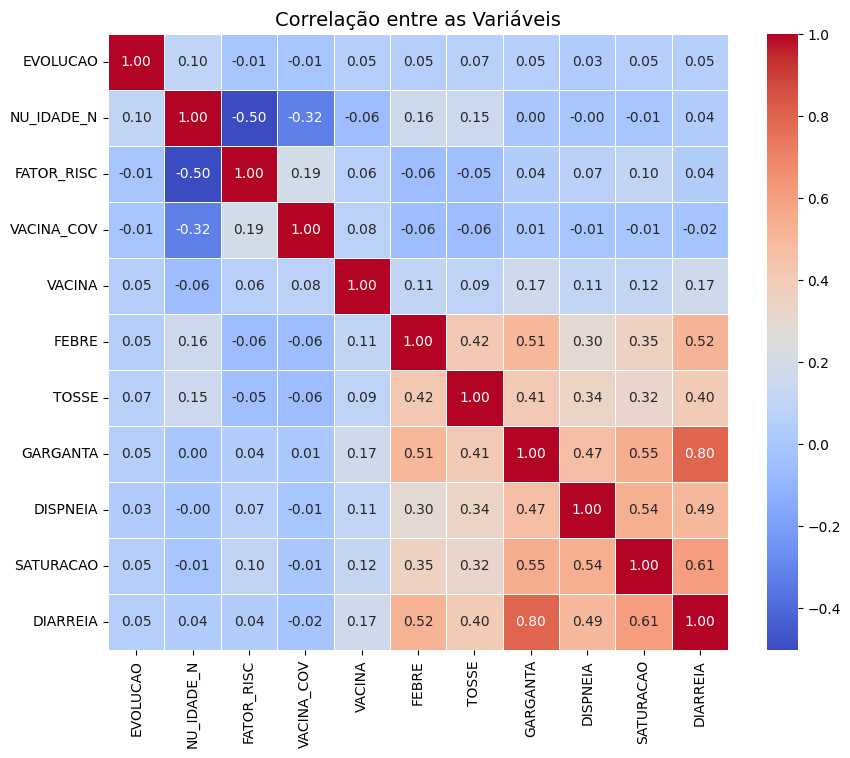

In [404]:
# Dividindo base para análise de correlação, para o diagrama, irei utilizar apenas variáveis categóricas
df_corr = df_clean.copy()

# Colunas de interesse
colunas_corr = ['EVOLUCAO', 'NU_IDADE_N', 'FATOR_RISC', 'VACINA_COV', 'VACINA',
                'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'SATURACAO', 'DIARREIA']

# Convertendo as colunas para numéricas, substituindo erros por NaN, e depois preenchendo NaN
df_corr[colunas_corr] = df_corr[colunas_corr].apply(pd.to_numeric, errors='coerce')

# Preenchendo valores nulos com um valor padrão (9)
df_corr[colunas_corr] = df_corr[colunas_corr].fillna(9)

# Gerando o heatmap de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr[colunas_corr].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Personalizando o gráfico
plt.title('Correlação entre as Variáveis', fontsize=14)
plt.show()

- Correlação negativa com idade: Pacientes com menor idade, tendem a ter menor fatores de risco.
- Vacinação COVID: A vacinação implica em uma diminuição dos sintomas (A leve correlação negativa indica isto), ainda os mesmos ainda podem ser sentidos.
- Vacinação GRIPE: Parece ter peso menor nos sintomas, do que a vacina do COVID
- Sintomas: Alta correlação entre si, o que aponta que o surgimento de todos os sintomas é muito comum, entre eles, Dor de Garganta, Saturação de 02 no sangue e febre.

#

## Análise Geográfica

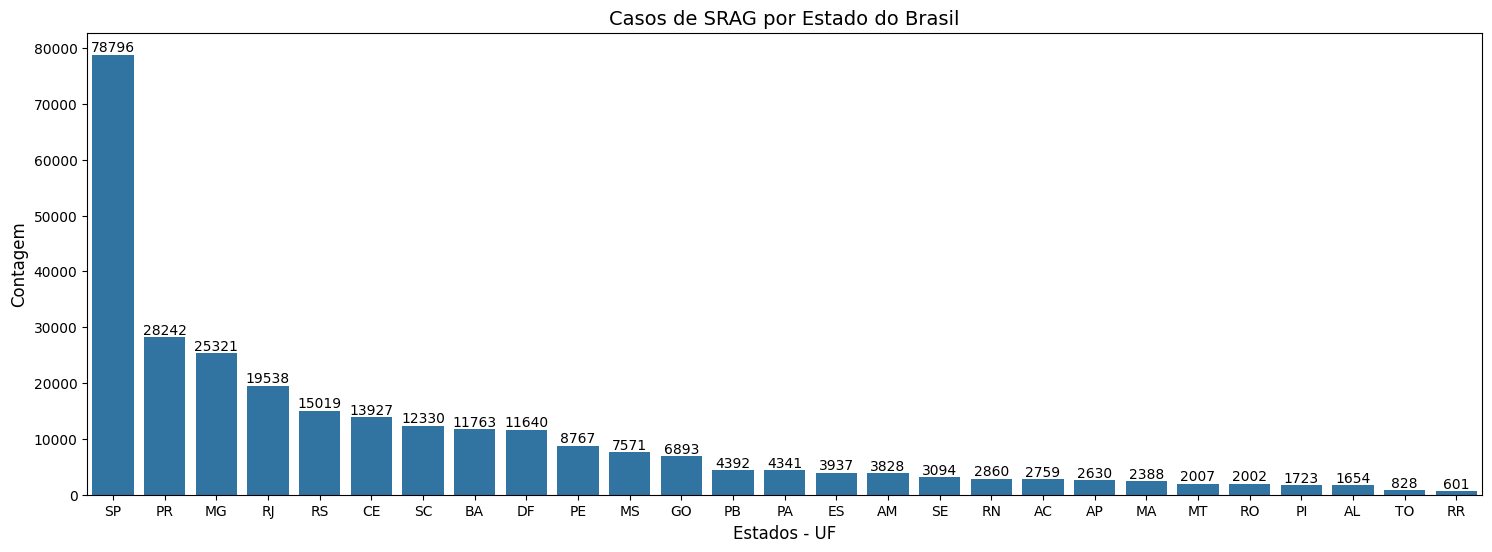

In [427]:
# Pacientes por Estado.
estado_counts = df_clean['SG_UF_NOT'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df_clean, x='SG_UF_NOT', order=estado_counts.index)

# Adicionando os valores no topo das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Personalizações
plt.title('Casos de SRAG por Estado do Brasil', fontsize=14)
plt.xlabel('Estados - UF', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.show()

Nesta análise podemos repara na valor acentuado que o etado de São Paulo representa, muito provavelmente este fator se agrava pela quantidade populacional.     
SP Em 2022 foi contabilizado uma população de 44,41 Milhões de habitantes, tendo 0,18% de casos de SRAG.    
Em comparação, PR que ficou em segundo lugar em 2022 foi contabilizado 11,44 Milhões de habitantes, representando 0,25% de casos de SRAG.   
Leitura interessante sobre casos em São Paulo - 2024: https://portal.fiocruz.br/noticia/2024/08/infogripe-aumentam-os-casos-de-srag-em-sao-paulo-e-bahia

C:\Users\rafae\AppData\Local\Temp\ipykernel_13084\106660962.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obitos['Raça'] = df_obitos['CS_RACA'].map(raca_mapping)


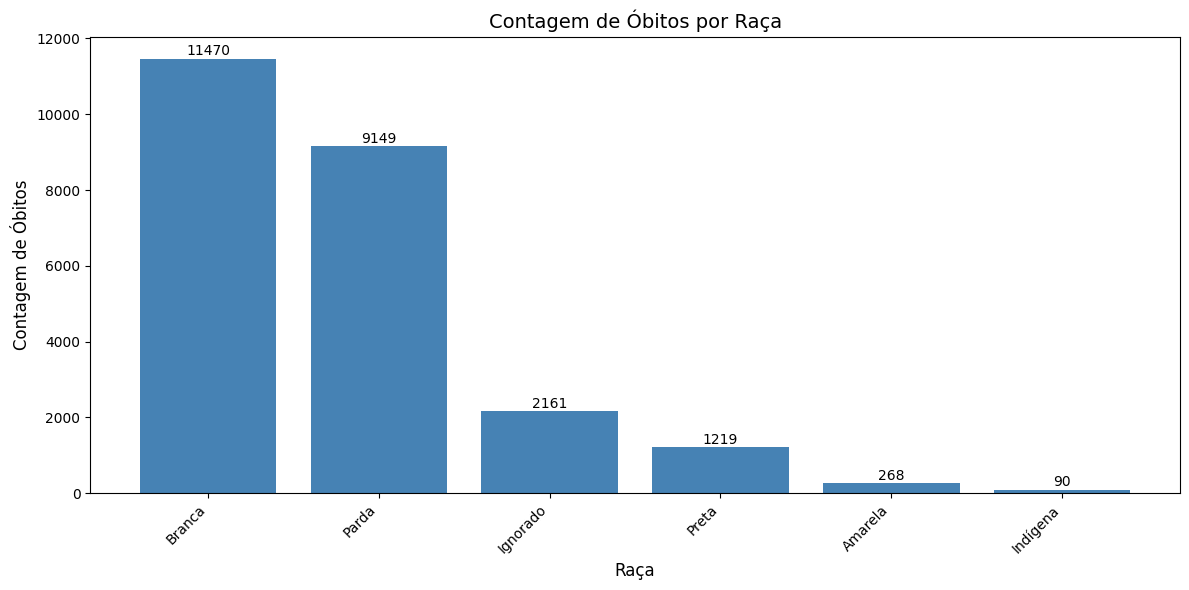

In [468]:
# Filtrando o dataframe para considerar apenas os óbitos
df_obitos = df_visu[df_visu['EVOLUCAO'] == 'Óbito']

# Mapeamento dos valores da coluna CS_RACA
raca_mapping = {
    1: 'Branca', 
    2: 'Preta', 
    3: 'Amarela', 
    4: 'Parda', 
    5: 'Indígena', 
    9: 'Ignorado'
}

# Substituindo os valores numéricos por seus respectivos nomes
df_obitos['Raça'] = df_obitos['CS_RACA'].map(raca_mapping)

# Contando a quantidade de óbitos por raça
contagem_obitos_raca = df_obitos['Raça'].value_counts()

# Convertendo o dicionário para um DataFrame para visualização
fator_risco_df = contagem_obitos_raca.reset_index()
fator_risco_df.columns = ['Raça', 'Contagem de Óbitos']

# Ordenando os dados pela contagem de óbitos
fator_risco_df = fator_risco_df.sort_values(by='Contagem de Óbitos', ascending=False)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
plt.bar(fator_risco_df['Raça'], fator_risco_df['Contagem de Óbitos'], color='steelblue')

# Adicionando os valores nas barras
for i, value in enumerate(fator_risco_df['Contagem de Óbitos']):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=10)

# Personalizações
plt.title('Contagem de Óbitos por Raça', fontsize=14)
plt.xlabel('Raça', fontsize=12)
plt.ylabel('Contagem de Óbitos', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show();

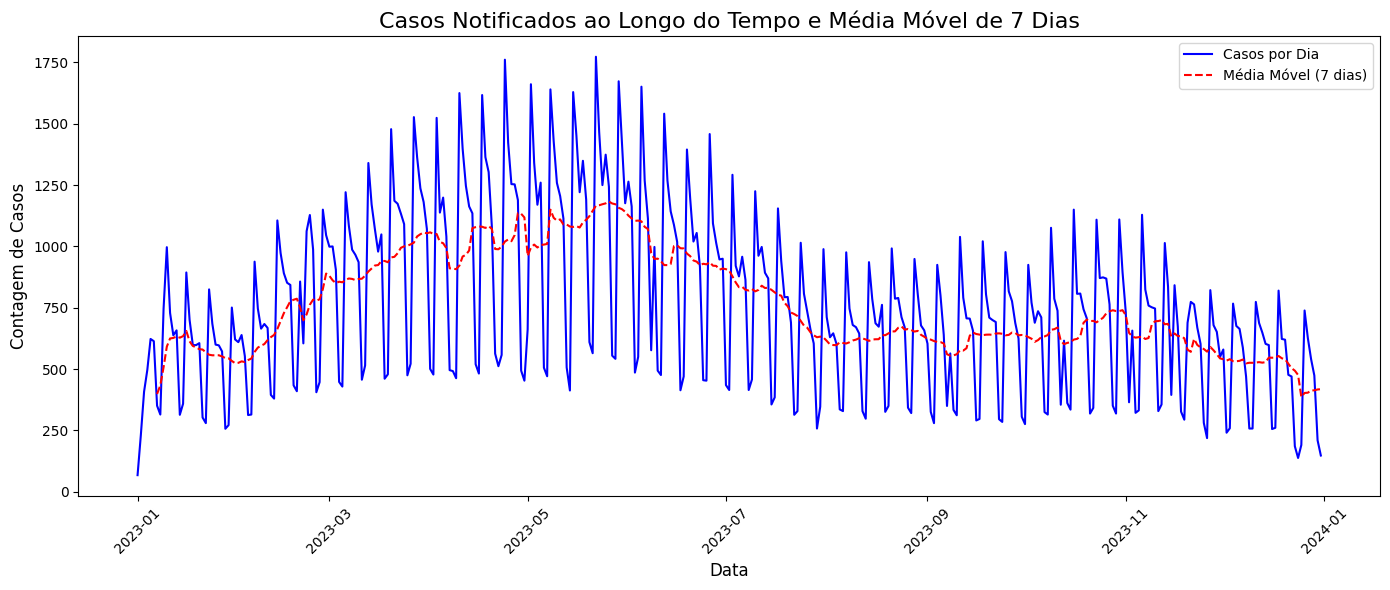

In [445]:
# Agrupar os dados pela data e contar os casos por dia
casos_por_data = df_clean.groupby(df_clean['DT_NOTIFIC'].dt.date).size()

# Calcular a média móvel de 7 dias
casos_por_data_7d = casos_por_data.rolling(window=7).mean()


# Criando gráfico
plt.figure(figsize=(14, 6))

# Plotando a contagem de casos por data
plt.plot(casos_por_data, label='Casos por Dia', color='blue')

# Plotando a média móvel
plt.plot(casos_por_data_7d, label='Média Móvel (7 dias)', color='red', linestyle='--')

# Adicionando título e legendas
plt.title('Casos Notificados ao Longo do Tempo e Média Móvel de 7 Dias', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Contagem de Casos', fontsize=12)
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


O gráfico acima indica um tipo de sazonalidade, com padrões repetidos, a tendência parece ser apontada para o início da semana, vamos realizar uma decomposição temporal para analisar possíveis padrões.
Tivemos um grando aumento de casos por dia entre os meses de Abril e Junho, o que é atípico, geralmente SRAG são agravadas com o clima Frio.

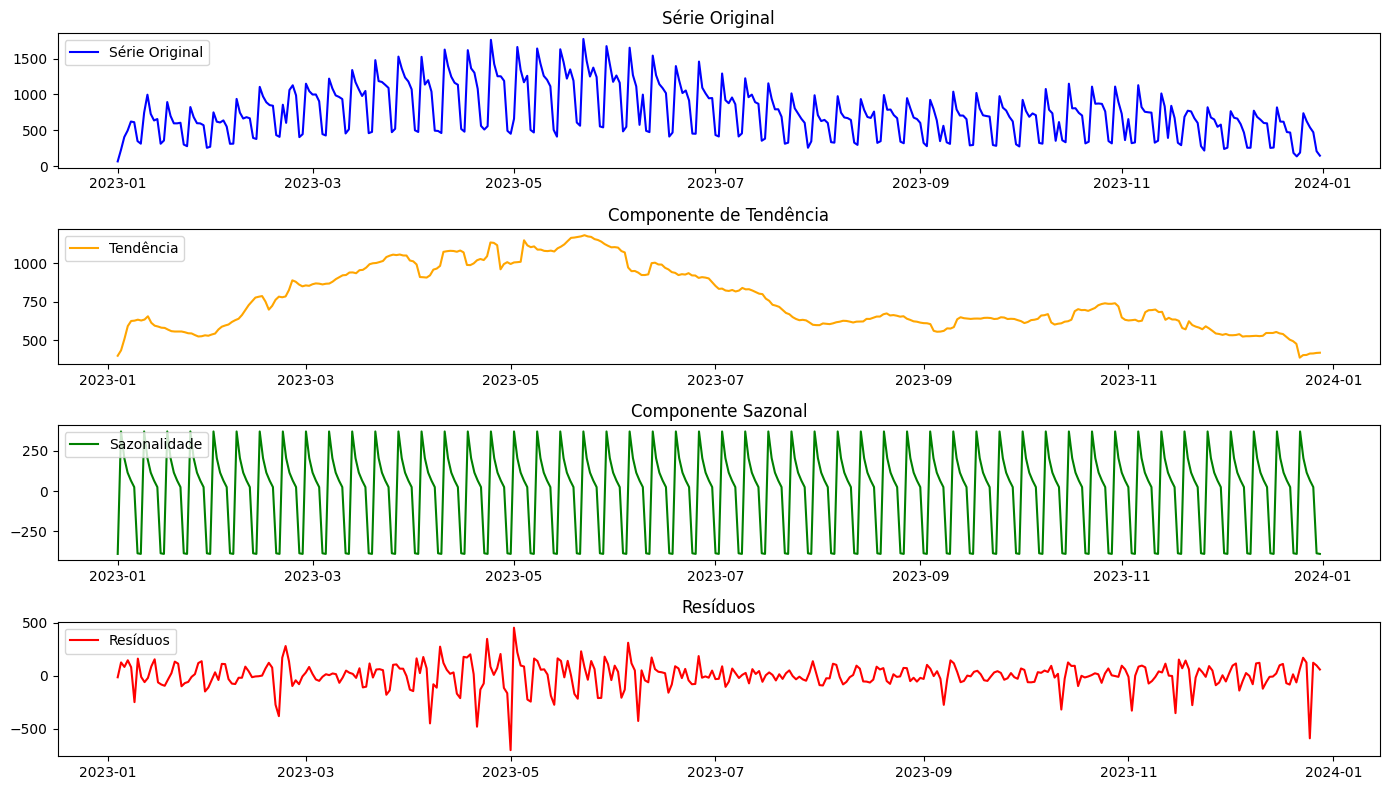

In [448]:
# Garantir que os dados possuem um índice datetime
casos_por_data.index = pd.to_datetime(casos_por_data.index)

# Realizando a decomposição sazonal
result = seasonal_decompose(casos_por_data, model='additive', period=7)

# Plotando os componentes da decomposição
plt.figure(figsize=(14, 8))

# Série original
plt.subplot(4, 1, 1)
plt.plot(casos_por_data, label='Série Original', color='blue')
plt.title('Série Original', fontsize=12)
plt.legend(loc='upper left')

# Componente de tendência
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendência', color='orange')
plt.title('Componente de Tendência', fontsize=12)
plt.legend(loc='upper left')

# Componente sazonal
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Sazonalidade', color='green')
plt.title('Componente Sazonal', fontsize=12)
plt.legend(loc='upper left')

# Resíduos
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Resíduos', color='red')
plt.title('Resíduos', fontsize=12)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

A representação acima mostra a existência de uma sazonalidade extremamente padrão neste ano, onde justamente tivemos o aumento de casos durante o início das semanas.

# 3 - Modelos de Machine Learning

Utilizando Random Forest Classifier - link: https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [461]:
# Criar uma cópia para o mapeamento
df_model = df_clean.copy()

# Mapeamento dos valores de EVOLUCAO
evolucao_mapping = {'1': 'Óbito', '2': 'Cura', '3': 'Óbito por outras causas', '9': None}
df_model['EVOLUCAO'] = df_model['EVOLUCAO'].astype(str).map(evolucao_mapping)

# Filtrar registros válidos (remover nulos)
df_model = df_model.dropna(subset=['EVOLUCAO'])

# Preparação e modelagem dos dados
features = ['NU_IDADE_N', 'CS_SEXO', 'CARDIOPATI', 'DIABETES', 'OBESIDADE', 'UTI', 'SUPORT_VEN']
target = 'EVOLUCAO'

# Converter categórico em dummies para variáveis de entrada
df_filtered = df_model[df_model['EVOLUCAO'].isin(['Óbito', 'Cura', 'Óbito por outras causas'])]
X = pd.get_dummies(df_filtered[features], drop_first=True)

# Mapear 'Óbito' para 1, 'Cura' para 0, 'Óbito por outras causas' será tratada como terceira categoria
y = df_filtered[target].map({'Óbito': 1, 'Cura': 0, 'Óbito por outras causas': 2})

# Verificar se há dados suficientes para a divisão treino/teste
if len(y) < 2:
    print("\nERRO: Dados insuficientes para treino e teste. Verifique o dataset filtrado.")
else:
    # Divisão em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Treinamento do modelo
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predições e avaliação
    y_pred = model.predict(X_test)

    # Relatório de classificação
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    print(confusion_matrix(y_test, y_pred))

    # AUC-ROC ajustada para multiclasse
    print("\nAUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted'))


              precision    recall  f1-score   support

           0       0.46      0.29      0.36      7299
           1       0.91      0.97      0.94     66711
           2       0.15      0.03      0.05      2480

    accuracy                           0.87     76490
   macro avg       0.51      0.43      0.45     76490
weighted avg       0.84      0.87      0.85     76490

[[ 2131  4962   206]
 [ 1800 64656   255]
 [  706  1691    83]]

AUC-ROC: 0.8388593350574889


#### Classe 1 - Cura
- Precision: 0.91 Indica que 91% das previsões de cura estão corretas, um excelente desempenho.

#### Classe 0 - Óbito
- Precision: 0.46 Indica que apenas 46% das previsões estão corretas.

#### Classe 2 - Óbito por outras causas
- Todas as métricas perfomaram mal nesta classe, porém ela não era o foco da nossa avaliação

#### AUC-ROC
0.84 indica um modelo que tem boa capacidade de discriminação entre as classes.

Utilizando o Gradient Boosting link - https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [465]:
# Preparação dos dados
df_model2 = df_clean.copy()

# Mapeamento dos valores de EVOLUCAO
evolucao_mapping = {'1': 'Óbito', '2': 'Cura', '3': 'Óbito por outras causas', '9': None}
df_model2['EVOLUCAO'] = df_model2['EVOLUCAO'].astype(str).map(evolucao_mapping)

# Filtrar registros válidos (remover nulos)
df_model2 = df_model2.dropna(subset=['EVOLUCAO'])

# Preparação das variáveis de entrada e saída
features = ['NU_IDADE_N', 'CS_SEXO', 'CARDIOPATI', 'DIABETES', 'OBESIDADE', 'UTI', 'SUPORT_VEN']
target = 'EVOLUCAO'

# Converter variáveis categóricas em dummies
df_filtered = df_model2[df_model2['EVOLUCAO'].isin(['Óbito', 'Cura', 'Óbito por outras causas'])]
X = pd.get_dummies(df_filtered[features], drop_first=True)

# Verificar e converter colunas de data para formato numérico
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(int)

# Mapear 'Óbito' para 1, 'Cura' para 0, 'Óbito por outras causas' como terceira categoria
y = df_filtered[target].map({'Óbito': 1, 'Cura': 0, 'Óbito por outras causas': 2})

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo Gradient Boosting
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Treinamento
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Relatório de classificação e AUC-ROC
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='weighted')

# Exibir os resultados
classification_rep, conf_matrix, auc_roc

d:\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Nova pasta\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


('              precision    recall  f1-score   support\n\n           0       0.53      0.31      0.39      7299\n           1       0.91      0.98      0.94     66711\n           2       0.00      0.00      0.00      2480\n\n    accuracy                           0.88     76490\n   macro avg       0.48      0.43      0.44     76490\nweighted avg       0.84      0.88      0.86     76490\n',
 array([[ 2244,  5055,     0],
        [ 1284, 65427,     0],
        [  727,  1753,     0]]),
 np.float64(0.8855672962745643))

#### Classe 1 - Cura
- Precision: 0.91 Indica que 91% das previsões de cura estão corretas, um excelente desempenho.

#### Classe 0 - Óbito
- Precision: 0.53 Indica que apenas 53% das previsões estão corretas, o que é um resultado ligeiramente melhor do que o modelo anterior.

#### Classe 2 - Óbito por outras causas
- Este modelo não foi possível prever esta classe corretamente.

#### AUC-ROC
0.89 indica um modelo que tem boa capacidade de discriminação entre as classes, performando melhor que o modelo anterior.   
Este seria o modelo que utilizaria para previsão de classes de cura e óbito, porém seria necessário uma otimização de hiperparâmetros, utilziando GridSearch -      
Link: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

# Relatório de Análises e Sugestões de Intervenção

Este relatório visa apresentar os resultados de análises sobre os casos de SRAG (Síndrome Respiratória Aguda Grave), com foco em fatores temporais, geográficos, de risco e os resultados de modelos de machine learning aplicados.

## Análises Temporais

- **Picos de Notificações:**  
  O período de abril a junho foi o de maior número de notificações e também o mais ruidoso. Este pico pode ter ocorrido devido a uma antecipação do período de frio, que tende a estar associado a um aumento nos casos de doenças respiratórias, como o SRAG.

- **Tendência Semanal:**  
  A tendência semanal mostrou que, ao longo do ano, os **maiores números de casos foram registrados nas segundas-feiras**. Este padrão sugere um comportamento de busca mais intensa por atendimento médico após o fim de semana, ou mesmo um reflexo de como as notificações são processadas. (O que seria o mais provável)

- **Previsões com SARIMAX:**  
  Modelos de previsão como o **SARIMAX** são extremamente úteis para este tipo de análise, já que podem capturar variações sazonais e fatores externos. Isso pode ajudar a antecipar surtos, fazendo com que os recursos médicos sejam alocados de maneira mais eficiente e assertiva.

## Análises Geográficas

- **Região Mais Afetada:**  
  A região **Sudeste** foi a mais impactada por notificações de SRAG. **São Paulo (SP)**, **Minas Gerais (MG)** e **Rio de Janeiro (RJ)**, com grandes densidades populacionais, representaram três das primeiras quatro colocações entre os estados com mais casos. Este fator geográfico tem um peso significativo na análise, visto que a **densidade populacional** influencia diretamente o número de notificações.

- **Diferença entre Sexos:**  
  A análise entre os sexos masculino e feminino não mostrou diferenças expressivas no número de casos. Isso indica que o gênero não parece ser um fator determinante nas notificações de SRAG, mas outras variáveis, como comorbidades e fatores ambientais, podem ser mais relevantes.

## Análise de Fatores de Risco

- **Impacto dos Fatores de Risco nos Óbitos:**  
  A presença de **fatores de risco** teve um impacto significativo na mortalidade entre pacientes com SRAG. **77% dos óbitos** ocorreram em pacientes que apresentavam algum fator de risco. Isso reforça a importância da identificação e controle preventivo desses fatores.

- **Principais Fatores de Risco:**  
  Os três fatores de risco mais comuns entre os óbitos foram:
  1. **Cardiopatia**
  2. **Diabetes**
  3. **Doenças Pneumáticas (como Pneumonia)**

  Esses dados sugerem que, para melhorar as taxas de sobrevivência, é fundamental focar em **estratégias de prevenção** para essas condições, principalmente no controle da saúde cardiovascular e metabólica.

## Sintomas

- **Sintomas Comuns em Pacientes com SRAG:**  
  A análise dos sintomas revelou que os mais comuns em pacientes com SRAG foram:
  1. **Dor de Garganta**
  2. **Saturação de O2 no Sangue**
  3. **Febre**
  4. **Dispineia** (falta de ar)

  **Dor de Garganta** e **Saturação de O2** foram os sintomas mais frequentemente relatados. Isso pode ser usado como **indicador precoce** para a triagem de pacientes, ajudando a priorizar casos mais graves.

## Modelos de Machine Learning

- **Desempenho dos Modelos:**  
  Para analisar as metas do banco de dados, foram aplicados dois modelos de **machine learning**, com destaque para o **Gradient Boosting**. O modelo apresentou bons resultados, mas há necessidade de ajustes finos nos **hiperparâmetros** para melhorar ainda mais sua capacidade de previsão.

- **Otimização de Hiperparâmetros:**  
  Técnicas como **Grid Search** ou **Random Search** podem ser utilizadas para otimizar os hiperparâmetros dos modelos, garantindo uma maior acurácia e capacidade de generalização.

## Sugestões de Intervenção

- **Estratégias Preventivas:**  
  Com base nas análises temporais e geográficas, uma ação focada no **período de pico (abril a junho)** pode ser essencial. Programas de **conscientização** e **distribuição de recursos médicos** nessas épocas podem mitigar o impacto das altas notificações.

- **Intervenção Baseada em Fatores de Risco:**  
  Considerando que uma **grande parte dos óbitos** ocorre em pacientes com comorbidades (como doenças cardíacas e diabetes), **intervenções preventivas** voltadas a esses grupos de risco seriam cruciais para reduzir a mortalidade. O desenvolvimento de **programas de saúde pública** que ajudem a controlar essas doenças seria um passo importante.

- **Integração de Machine Learning:**  
  Incorporar **modelos de machine learning** para prever surtos e gerenciar recursos de saúde pode ser um avanço significativo. Isso permitirá uma **resposta mais ágil e coordenada**, ajustando os recursos médicos de acordo com a demanda prevista.

---

**Conclusão:**
As análises feitas permitem que ações de **prevenção, controle e gestão de recursos** sejam mais assertivas, principalmente por meio do uso de dados históricos e modelos preditivos. A implementação de estratégias baseadas em dados pode resultar em uma resposta mais eficiente aos surtos de SRAG e uma redução nas taxas de mortalidade, especialmente entre os grupos mais vulneráveis, com a evolução dos estudos em dados, é importante que cada vez mais tenhamos implementações em nosso modelo de saúde.
